# Analysis

:::{tip}
This page itself is written as an [RMarkdown](https://rmarkdown.rstudio.com/) notebook!
:::

## Previous Work

The previous work for this project is included here as well.

In [1]:
setwd("/home/rstudio/scripts")

suppressWarnings(suppressMessages(suppressPackageStartupMessages({
library("kableExtra")
library("openxlsx")
library("ggplot2")
library("PCAtools")
library("factoextra")
library("FactoMineR")
library("cowplot")
library("ggpubr")
library("limma")
library("openxlsx")
library("matrixStats")
library("pcaExplorer")
library("dplyr")
})))

 
Load the user-supplied data.

In [2]:
# Load and clean data...
MQ <- readRDS("../data/external/MQ.RData")
MNQ <- readRDS("../data/external/MNQ.RData")
MNQC <- readRDS("../data/external/MNQC.RData")
annotation <- readRDS("../data/external/annotation.RDS")
ann <- annotation[match(rownames(MNQC), annotation$Name),c(1:4, 12:19, 22:ncol(annotation))]
QCT <- read.csv("../data/external/SuperG_pQCT_PE.csv", sep = ";", dec=".", strip.white = TRUE)
phenoData <- readRDS("../data/external/phenoData.RData")
pheno	<- phenoData %>%
    as.data.frame() %>%
    select(-c(Basename, filenames, xMed, yMed, predictedSex)) %>%
    mutate(Fx = ifelse(Fx == 0, "noFx", "Fx")) %>%
    mutate(Batch = ifelse(Batch == 1, "Batch1", "Batch2")) %>%
    mutate(slide_array = paste(Slide, Array, sep="_")) %>%
    mutate(group = paste(BMD, Fx, sep="_")) %>%
    mutate(sample_name = gsub("blood.*", "", sample_name)) %>%
    mutate(sample_names= paste0("MKB", sample_name)) %>%
    left_join(select(QCT, 
                    id, 
                    TRAB_A_RAD_4, 
                    TRAB_DEN_RAD_4, 
                    TOT_A_RAD_4, 
                    TOT_DEN_RAD_4, 
                    CRT_A_RAD_4, 
                    CRT_DEN_RAD_4, 
                    CRT_THK_C_RAD_4), by = c("sample_names" = "id")) %>%
    select(-c(Slide, Array)) %>%
    mutate_at(.vars = vars("Chip.number", "Batch", "BMD", "Fx", "group"), factor) %>%
    tibble::column_to_rownames(var = "sample_name")

colnames(MQ)	<- rownames(pheno[match(colnames(MQ), pheno$slide_array),]) 
colnames(MNQ)	<- rownames(pheno[match(colnames(MNQ), pheno$slide_array),]) 

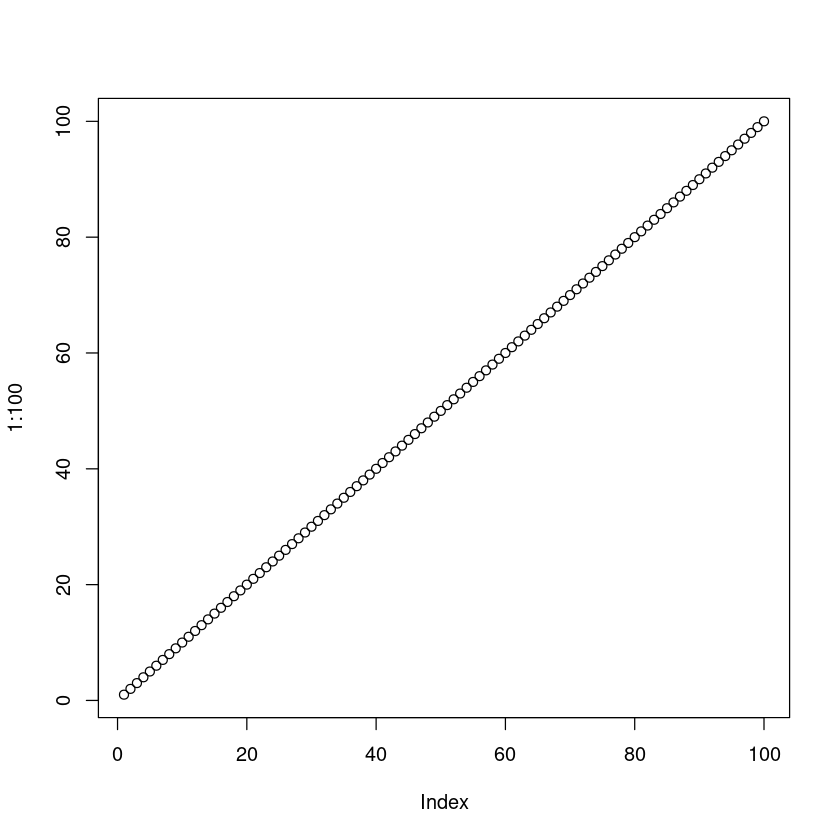

In [3]:
plot(1:100)

a <- "Vincent"